In [165]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# PREPARATION PROCESS

Constraint:

1. Two or more activities can't share the same teacher or the same students sets in a single schedule
2. Maximum number of classroom and laboratorium used in a single schedule is 28 and 10, respectively

In [166]:
# Input data from csv (comma-separated value) file, and maximum number of classroom and laboratorium available
df = pd.read_csv("Data/FET ALL_LAB_KELAS.csv")
max_class = int(input("Enter the maximum number of classroom: "))
max_lab = int(input("Enter the maximum number of laboratorium: "))
df

Activity Id Students Sets  \
0              1      CE-01-01   
1              2      TE-01-01   
2              3      TE-02-02   
3              4      TE-03-01   
4              5      TE-03-01   
..           ...           ...   
404          405      IS-04-02   
405          406      IS-04-02   
406          407      IS-03-03   
407          408      IS-03-04   
408          409      IS-03-05   

                                               Subject Teachers   Room  SKS  
0                        23278 - FEA4054 - TUGAS AKHIR        0  KELAS    4  
1                        23350 - FEA4054 - TUGAS AKHIR        0  KELAS    4  
2                   23339 - TEA40A3 - KOMUNIKASI OPTIK      AAF  KELAS    3  
3                        23206 - FEA2214 - ELEKTRONIKA      AAF  KELAS    2  
4                        23206 - FEA2214 - ELEKTRONIKA      AAF  KELAS    2  
..                                                 ...      ...    ...  ...  
404     23800 - FIA1214 - ALGORITMA  DAN STRUKTUR DATA      YPS  KELAS    3  
405     23800 - FIA1214 - ALGORITMA  DAN STRUKTUR DATA      YPS    LAB    3  
406  23809 - ISA2213 - ANALISIS DAN PERANCANGAN SIS...      ZAK  KELAS    3  
407  23809 - ISA2213 - ANALISIS DAN PERANCANGAN SIS...      ZAK  KELAS    3  
408  23809 - ISA2213 - ANALISIS DAN PERANCANGAN SIS...      ZAK  KELAS    3  

[409 rows x 6 columns]

In [167]:
# Initialize the graph with zeros
Graph = np.zeros((len(df), len(df)), dtype=int)
network = nx.Graph()
network.add_nodes_from(df.index) # Initiatiate nodes for the visualisation
print(f"This network has {network.number_of_nodes()} nodes")
Graph

This network has 409 nodes


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [168]:
# Assign value to the adjacency matrix by the connectivity of the nodes
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.loc[i, "Students Sets"] == df.loc[j, "Students Sets"] or df.loc[i, "Teachers"] == df.loc[j, "Teachers"]:
            Graph[i][j] = 1
            Graph[j][i] = 1
            network.add_edge(i, j) # Add edges for the visualisation based on the rule
Graph

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

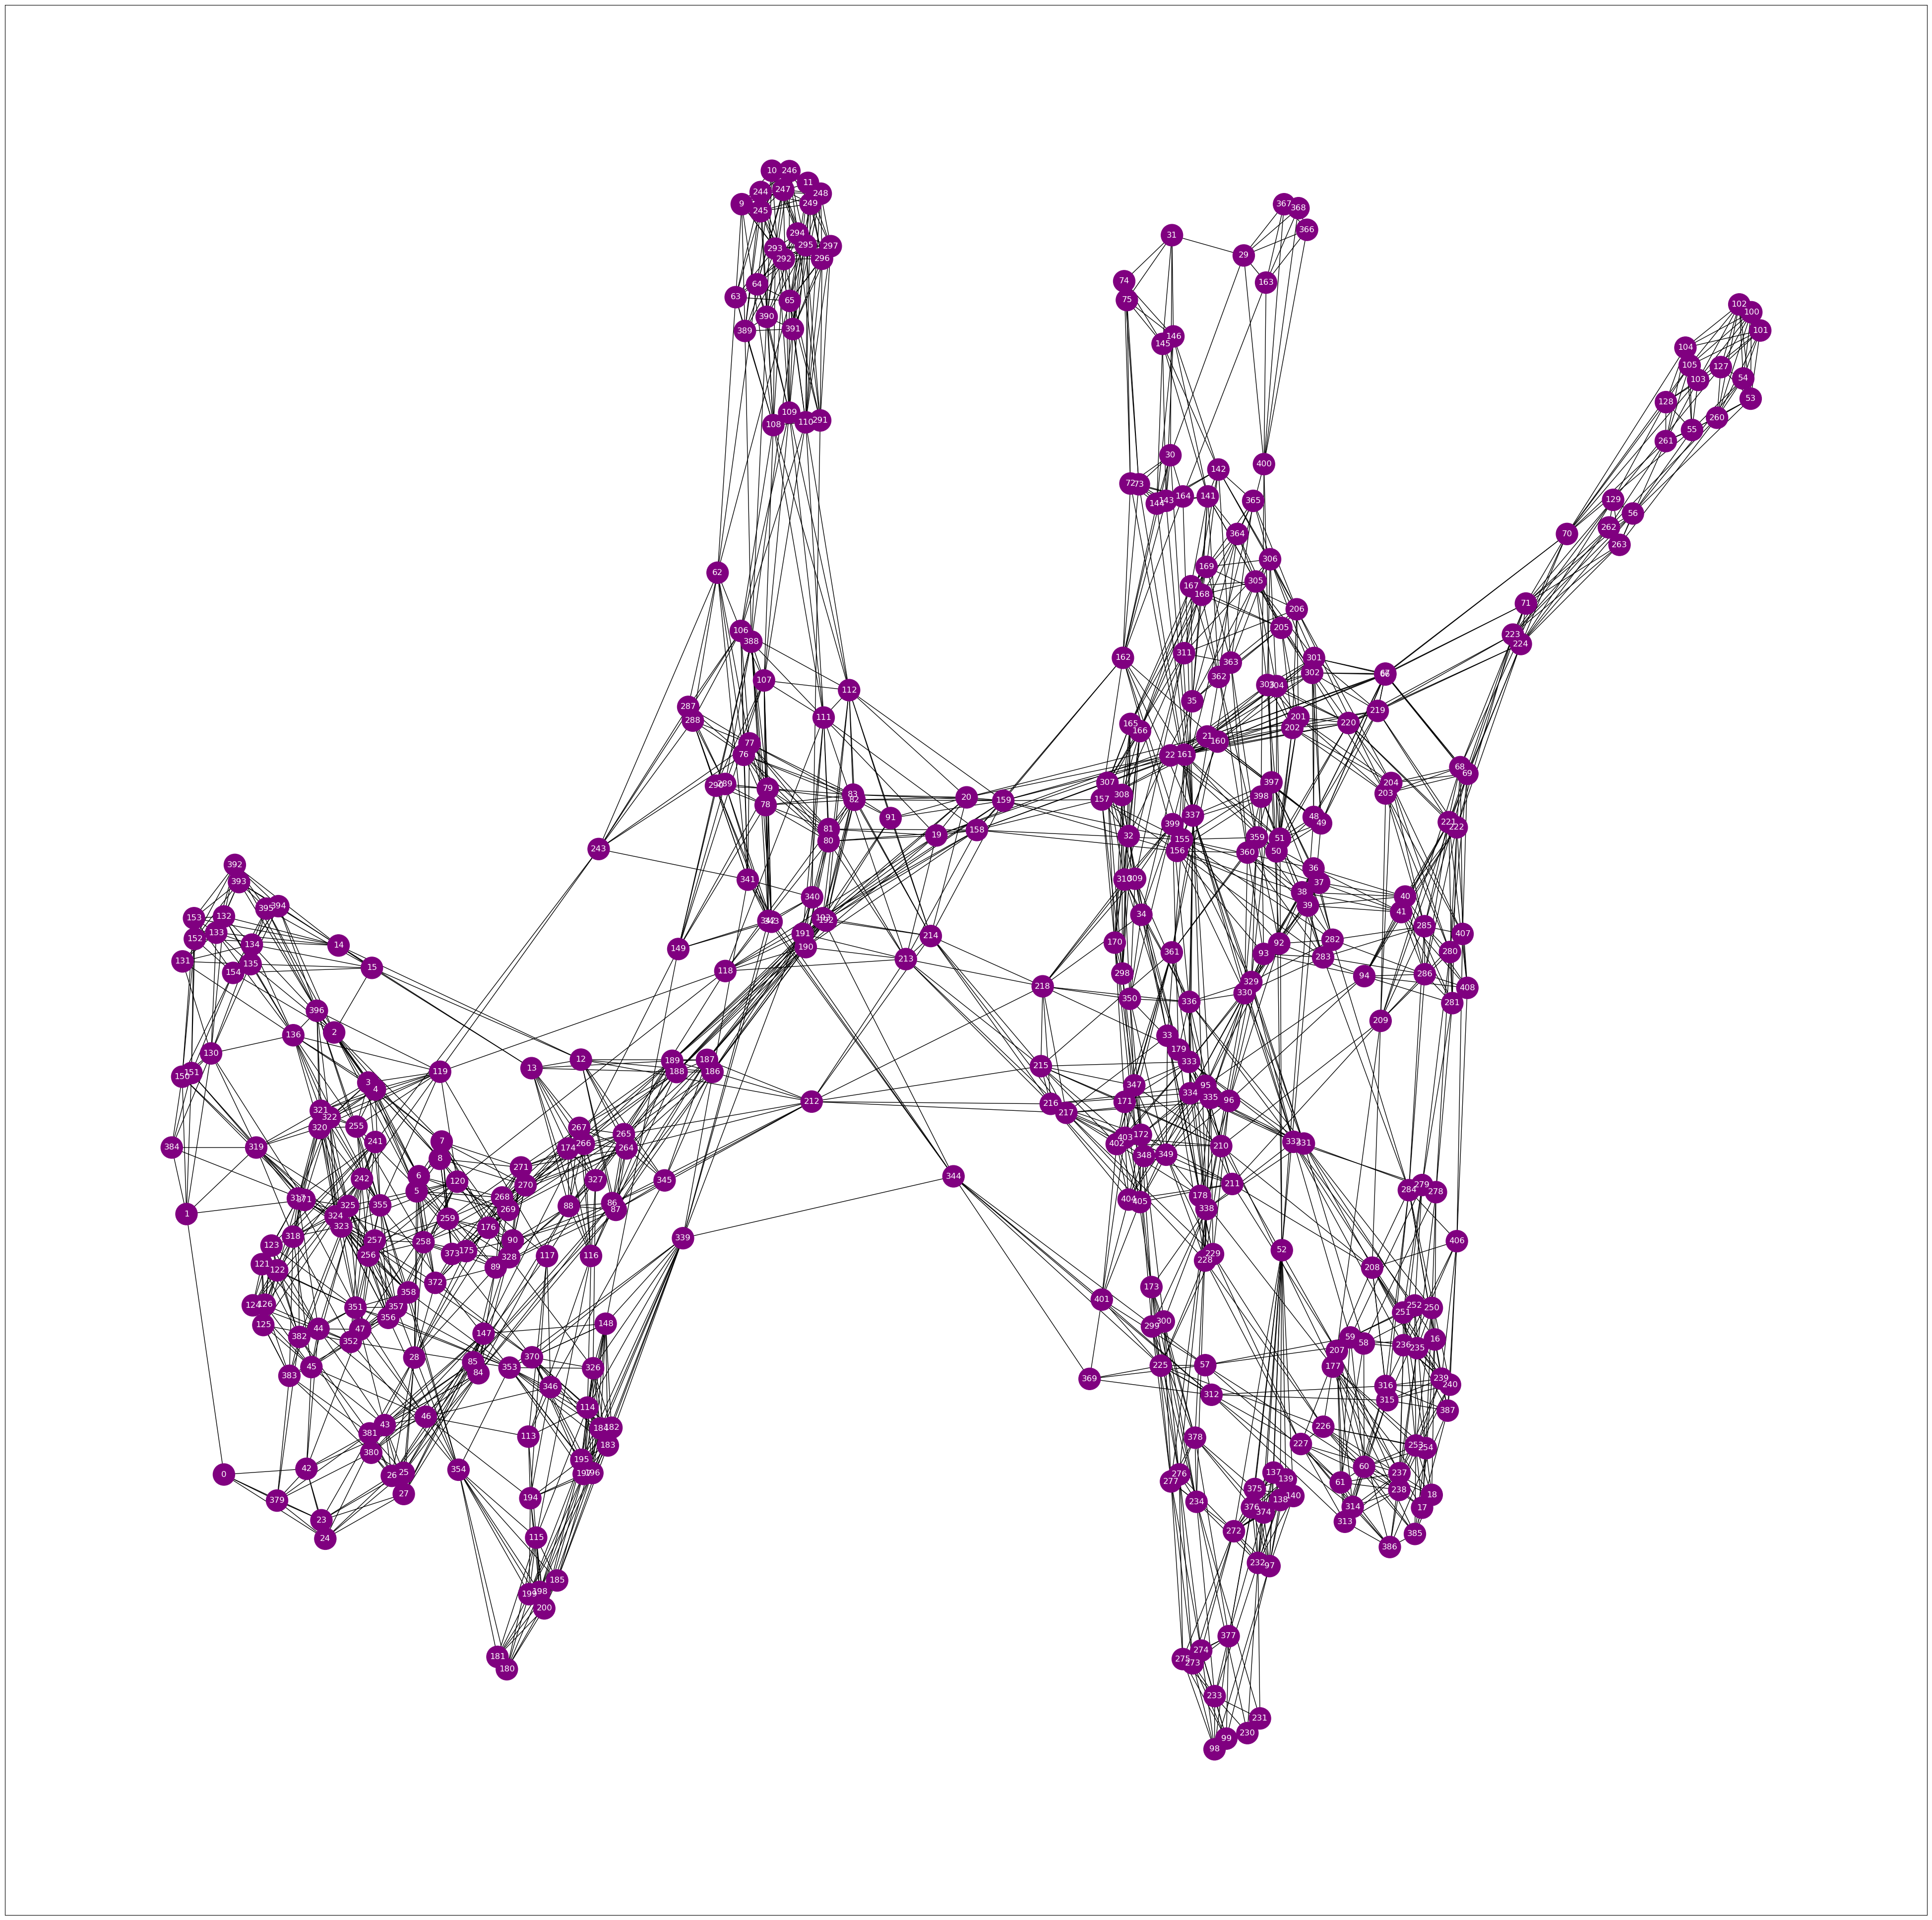

In [169]:
# Graph visualisation before colorized
color_map = ["purple"]*(network.number_of_nodes())
pos = nx.spring_layout(network, seed = 1)
fig, ax = plt.subplots(figsize=(50,50))
ax = nx.draw_networkx(network, pos = pos, with_labels=True, node_size=1000, width=1, node_color=color_map, font_size=12, font_color="white", ax=ax)
fig.savefig("Result/graph-before-colorized.png", bbox_inches='tight')

In [170]:
# Calculate the degree of each node, here's node as the key and its degree as the value of dictionary
nodeDegree = {}
for i in range(len(Graph)):
    nodeDegree[i] = sum(Graph[i])
nodeDegree

{0: 5,
 1: 7,
 2: 12,
 3: 14,
 4: 14,
 5: 13,
 6: 13,
 7: 13,
 8: 13,
 9: 9,
 10: 9,
 11: 9,
 12: 11,
 13: 11,
 14: 9,
 15: 9,
 16: 7,
 17: 8,
 18: 8,
 19: 11,
 20: 11,
 21: 11,
 22: 11,
 23: 8,
 24: 8,
 25: 11,
 26: 11,
 27: 11,
 28: 13,
 29: 7,
 30: 9,
 31: 6,
 32: 10,
 33: 10,
 34: 10,
 35: 10,
 36: 11,
 37: 11,
 38: 11,
 39: 11,
 40: 11,
 41: 11,
 42: 9,
 43: 13,
 44: 12,
 45: 12,
 46: 9,
 47: 14,
 48: 11,
 49: 11,
 50: 11,
 51: 11,
 52: 14,
 53: 8,
 54: 8,
 55: 9,
 56: 9,
 57: 9,
 58: 9,
 59: 9,
 60: 11,
 61: 11,
 62: 10,
 63: 10,
 64: 10,
 65: 10,
 66: 12,
 67: 12,
 68: 11,
 69: 11,
 70: 11,
 71: 11,
 72: 9,
 73: 9,
 74: 6,
 75: 6,
 76: 13,
 77: 13,
 78: 14,
 79: 14,
 80: 14,
 81: 14,
 82: 14,
 83: 14,
 84: 13,
 85: 13,
 86: 13,
 87: 13,
 88: 14,
 89: 14,
 90: 14,
 91: 8,
 92: 11,
 93: 11,
 94: 11,
 95: 11,
 96: 11,
 97: 12,
 98: 7,
 99: 7,
 100: 9,
 101: 9,
 102: 9,
 103: 9,
 104: 9,
 105: 9,
 106: 13,
 107: 14,
 108: 13,
 109: 13,
 110: 13,
 111: 14,
 112: 14,
 113: 7,
 114: 14

In [171]:
# Sort the nodes by its degree in descending order
pairedSortedNode = sorted(nodeDegree.items(), key=lambda x: x[1], reverse=True) # Sort by dictionary value (node's degree)
sortedNode = np.zeros((len(df)), dtype=int) # Initiate numpy array by zero before assigning sorted node
for i in range(len(df)): 
    sortedNode[i] = pairedSortedNode[i][0] # Assign dictionary key (node) to sorted node list
sortedNode

array([353, 329, 330, 333, 334, 335, 336, 337, 338, 339, 355, 136, 158,
       159, 160, 161, 195, 196, 197, 272, 317, 318, 320, 321, 322, 323,
       324, 325,   3,   4,  47,  52,  78,  79,  80,  81,  82,  83,  88,
        89,  90, 107, 111, 112, 114, 155, 156, 157, 162, 186, 187, 188,
       189, 190, 191, 192, 193, 212, 213, 214, 232, 264, 265, 266, 267,
       268, 269, 270, 271, 319, 331, 332, 351, 352, 354, 356, 357, 358,
       370,   5,   6,   7,   8,  28,  43,  76,  77,  84,  85,  86,  87,
       106, 108, 109, 110, 148, 215, 216, 217, 218, 219, 220, 255, 326,
       396,   2,  44,  45,  66,  67,  97, 119, 120, 130, 141, 182, 183,
       184, 201, 202, 205, 256, 257, 258, 259, 292, 293, 294, 295, 296,
       297, 301, 302, 303, 304, 305, 341, 342, 343, 374, 375, 376,  12,
        13,  19,  20,  21,  22,  25,  26,  27,  36,  37,  38,  39,  40,
        41,  48,  49,  50,  51,  60,  61,  68,  69,  70,  71,  92,  93,
        94,  95,  96, 116, 118, 132, 133, 134, 135, 142, 143, 14

In [172]:
colorClass = 0 # color for class
colorLab = 0 # color for laboratorium
color_list = ["lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow", "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue"] # List of possible color (it has to be equal to the number of nodes (for the worst case), but it's okay because we only need this for the visualisation)

# Main Process

In [173]:
# Function to check whether a new node is not adjacent to every single element of a given list
def isNotAdjacent(x, _list, _graph):
    for i in _list:
        if _graph[x][i] == 1:
            return False
    return True

In [174]:
scheduleTime = [
    'Senin, 07:00 - 09.50',
    'Senin, 10.00 - 12.50',
    'Senin, 13.00 - 15.50',
    'Selasa, 07:00 - 09.50',
    'Selasa, 10.00 - 12.50',
    'Selasa, 13.00 - 15.50',
    'Rabu, 07:00 - 09.50',
    'Rabu, 10.00 - 12.50',
    'Rabu, 13.00 - 15.50',
    'Kamis, 07:00 - 09.50',
    'Kamis, 10.00 - 12.50',
    'Jum\'at, 07.00 - 09.50',
    'Jum\'at, 10.00 - 12.50',
    'Jum\'at, 13.00 - 15.50'
]

In [175]:
# Welch-Powell Algorithm, this algorithm runs in O(N*N) time complexity
colorizedNode = {}
listOfColorizedNode = []
for i in sortedNode:
    if i not in listOfColorizedNode:
        listOfColorizedNode.append(i)
        listOfAdjacentNode = []
        if df.loc[i, "Room"] == "KELAS":
            counterClass, counterLab = 1, 0
            colorizedNode[i] = colorClass
            color_map[i] = color_list[colorClass]
        elif df.loc[i, "Room"] == "LAB":
            counterClass, counterLab = 0, 1
            colorizedNode[i] = colorLab
            color_map[i] = color_list[colorLab]
        for j in sortedNode:
            if Graph[i][j] == 0 and i != j and isNotAdjacent(j, listOfAdjacentNode, Graph) == True and j not in listOfColorizedNode and df.loc[j, "Room"] == "KELAS" and counterClass < max_class:
                colorizedNode[j] = colorClass
                color_map[j] = color_list[colorClass]
                listOfColorizedNode.append(j)
                listOfAdjacentNode.append(j)
                counterClass = counterClass + 1
            elif Graph[i][j] == 0 and i != j and isNotAdjacent(j, listOfAdjacentNode, Graph) == True and j not in listOfColorizedNode and df.loc[j, "Room"] == "LAB" and counterLab < max_lab:
                colorizedNode[j] = colorLab
                color_map[j] = color_list[colorLab]
                listOfColorizedNode.append(j)
                listOfAdjacentNode.append(j)
                counterLab = counterLab + 1
            elif counterClass == max_class and counterLab == max_lab:
                break
        listOfAdjacentNode *= 0
        colorLab = colorLab + 1
        colorClass = colorClass + 1
colorizedNode

{353: 0,
 329: 0,
 136: 0,
 158: 0,
 272: 0,
 317: 0,
 47: 0,
 78: 0,
 88: 0,
 112: 0,
 186: 0,
 268: 0,
 7: 0,
 215: 0,
 219: 0,
 141: 0,
 201: 0,
 292: 0,
 341: 0,
 25: 0,
 38: 0,
 60: 0,
 68: 0,
 94: 0,
 198: 0,
 207: 0,
 234: 0,
 239: 0,
 246: 0,
 306: 0,
 383: 0,
 32: 0,
 65: 0,
 154: 0,
 172: 0,
 228: 0,
 310: 0,
 73: 0,
 101: 0,
 330: 1,
 339: 1,
 355: 1,
 159: 1,
 318: 1,
 52: 1,
 79: 1,
 89: 1,
 111: 1,
 187: 1,
 266: 1,
 8: 1,
 43: 1,
 216: 1,
 220: 1,
 66: 1,
 120: 1,
 130: 1,
 205: 1,
 293: 1,
 36: 1,
 61: 1,
 96: 1,
 142: 1,
 199: 1,
 208: 1,
 226: 1,
 247: 1,
 276: 1,
 285: 1,
 361: 1,
 382: 1,
 34: 1,
 62: 1,
 165: 1,
 233: 1,
 235: 1,
 281: 1,
 391: 1,
 104: 1,
 333: 2,
 160: 2,
 195: 2,
 320: 2,
 80: 2,
 90: 2,
 107: 2,
 188: 2,
 212: 2,
 232: 2,
 269: 2,
 351: 2,
 2: 2,
 45: 2,
 202: 2,
 256: 2,
 294: 2,
 305: 2,
 20: 2,
 26: 2,
 37: 2,
 69: 2,
 93: 2,
 132: 2,
 143: 2,
 211: 2,
 221: 2,
 227: 2,
 240: 2,
 244: 2,
 277: 2,
 33: 2,
 115: 2,
 166: 2,
 253: 2,
 309: 2,
 

In [176]:
for t,w in sorted(colorizedNode.items()):
  print("Node",t,"  \t=","Color", w)

Node 0   	= Color 11
Node 1   	= Color 10
Node 2   	= Color 2
Node 3   	= Color 5
Node 4   	= Color 6
Node 5   	= Color 3
Node 6   	= Color 4
Node 7   	= Color 0
Node 8   	= Color 1
Node 9   	= Color 7
Node 10   	= Color 6
Node 11   	= Color 8
Node 12   	= Color 7
Node 13   	= Color 4
Node 14   	= Color 5
Node 15   	= Color 3
Node 16   	= Color 10
Node 17   	= Color 9
Node 18   	= Color 5
Node 19   	= Color 7
Node 20   	= Color 2
Node 21   	= Color 6
Node 22   	= Color 4
Node 23   	= Color 8
Node 24   	= Color 9
Node 25   	= Color 0
Node 26   	= Color 2
Node 27   	= Color 6
Node 28   	= Color 5
Node 29   	= Color 10
Node 30   	= Color 3
Node 31   	= Color 9
Node 32   	= Color 0
Node 33   	= Color 2
Node 34   	= Color 1
Node 35   	= Color 4
Node 36   	= Color 1
Node 37   	= Color 2
Node 38   	= Color 0
Node 39   	= Color 3
Node 40   	= Color 4
Node 41   	= Color 5
Node 42   	= Color 4
Node 43   	= Color 1
Node 44   	= Color 3
Node 45   	= Color 2
Node 46   	= Color 5
Node 47   	= Color 

In [177]:
# Activity is the colorized node, schedule is the color of a node
schedule_list = []
for activity, schedule in sorted(colorizedNode.items()): # Assign the sorted colorized node by node's name (Activity ID) to a new list
    schedule_list.append(schedule)
df["Schedules"] = schedule_list # Add new column of schedule of an activity
df.head(50)

Activity Id Students Sets  \
0             1      CE-01-01   
1             2      TE-01-01   
2             3      TE-02-02   
3             4      TE-03-01   
4             5      TE-03-01   
5             6      TE-04-01   
6             7      TE-04-01   
7             8      TE-04-02   
8             9      TE-04-02   
9            10      IE-03-01   
10           11      IE-03-02   
11           12      IE-03-03   
12           13      CE-04-01   
13           14      EE-04-01   
14           15      TE-02-01   
15           16      TE-02-02   
16           17      IS-02-01   
17           18      IS-03-01   
18           19      IS-03-01   
19           20      IE-04-01   
20           21      IE-04-02   
21           22      IF-01-01   
22           23      IF-01-02   
23           24      CE-01-01   
24           25      CE-01-01   
25           26      CE-02-01   
26           27      CE-02-01   
27           28      CE-02-01   
28           29      TE-04-01   
29           30      IT-01-01   
30           31      IT-04-01   
31           32      IT-04-02   
32           33      DS-01-01   
33           34      IS-04-03   
34           35      IS-04-04   
35           36      IT-02-01   
36           37      DB-01-01   
37           38      DB-01-01   
38           39      DB-01-02   
39           40      DB-01-02   
40           41      IS-03-05   
41           42      IS-03-05   
42           43      CE-01-01   
43           44      CE-02-01   
44           45      CE-03-01   
45           46      CE-03-02   
46           47      EE-01-01   
47           48      TE-03-02   
48           49      IF-01-01   
49           50      IF-01-01   

                                              Subject Teachers   Room  SKS  \
0                       23278 - FEA4054 - TUGAS AKHIR        0  KELAS    4   
1                       23350 - FEA4054 - TUGAS AKHIR        0  KELAS    4   
2                  23339 - TEA40A3 - KOMUNIKASI OPTIK      AAF  KELAS    3   
3                       23206 - FEA2214 - ELEKTRONIKA      AAF  KELAS    2   
4                       23206 - FEA2214 - ELEKTRONIKA      AAF  KELAS    2   
5                       23181 - MAA1214 - KALKULUS 2A      AAF  KELAS    2   
6                       23181 - MAA1214 - KALKULUS 2A      AAF  KELAS    2   
7                       23181 - MAA1214 - KALKULUS 2A      AAF  KELAS    2   
8                       23181 - MAA1214 - KALKULUS 2A      AAF  KELAS    2   
9   23585 - HUA10A2 - PENDIDIKAN AGAMA DAN ETIKA -...      AAS  KELAS    2   
10  23585 - HUA10A2 - PENDIDIKAN AGAMA DAN ETIKA -...      AAS  KELAS    2   
11  23585 - HUA10A2 - PENDIDIKAN AGAMA DAN ETIKA -...      AAS  KELAS    2   
12                 23209 - LAA1022 - BAHASA INGGRIS 2      AFR  KELAS    2   
13                 23291 - LAA1022 - BAHASA INGGRIS 2      AFR  KELAS    2   
14                 23184 - LAA1022 - BAHASA INGGRIS 2      AFR  KELAS    2   
15                 23184 - LAA1022 - BAHASA INGGRIS 2      AFR  KELAS    2   
16  23825 - ISA3242 - ETIKA PROFESI TEKNOLOGI INFO...      AGS  KELAS    2   
17          23812 - FIA2014 - PERANCANGAN  BASIS DATA      AGS  KELAS    3   
18          23812 - FIA2014 - PERANCANGAN  BASIS DATA      AGS    LAB    3   
19                 23433 - LAA1022 - BAHASA INGGRIS 2      ALD  KELAS    2   
20                 23433 - LAA1022 - BAHASA INGGRIS 2      ALD  KELAS    2   
21                  23921 - FIB1052 - BAHASA  INGGRIS      ALD  KELAS    2   
22                  23921 - FIB1052 - BAHASA  INGGRIS      ALD  KELAS    2   
23               23295 - CEA40H3 - KOMPUTASI PARALLEL      ALF  KELAS    3   
24  23292 - CEA40F3 - KENDARAAN CERDAS OTOMATIS TE...      ALF  KELAS    3   
25         23366 - CEA3221 - PRAKTIKUM SISTEM OPERASI      ALF    LAB    1   
26                   23364 - CEA3223 - SISTEM OPERASI      ALF  KELAS    3   
27                23369 - CEA3243 - KECERDASAN BUATAN      ALF  KELAS    3   
28        23188 - FEA1013 - ALGORITMA DAN PEMROGRAMAN     

In [178]:
df.sort_values(by='Schedules', inplace=True)
df

Activity Id Students Sets  \
88            89      EE-04-01   
141          142      IT-02-01   
38            39      DB-01-02   
219          220      IF-01-01   
329          330      DB-01-01   
..           ...           ...   
346          347      EE-01-01   
163          164      IT-01-01   
366          367      IT-01-01   
367          368      IT-01-01   
368          369      IT-01-01   

                                               Subject Teachers   Room  SKS  \
88   23308 - FEA1011 - PRAKTIKUM ALGORITMA DAN PEMR...      BLM    LAB    1   
141               23769 - ITA3213 - PEMROGRAMAN MOBILE      FZN  KELAS    3   
38   23986 - DBB1224 - ALGORITMA DAN PEMROGRAMAN KO...      ANO    LAB    3   
219                       23923 - IFB1223 - KALKULUS 2      MDF  KELAS    3   
329                 23984 - FIB1063 - BAHASA INGGRIS 2      RZK  KELAS    2   
..                                                 ...      ...    ...  ...   
346    23386 - HUA1023 - PANCASILA DAN KEWARGANEGARAAN      SMH  KELAS    3   
163  23775 - FIA4022 - METODE PENELITIAN DAN PENGEM...      HEL  KELAS    2   
366                    23774 - FIA4012 - KERJA PRAKTIK      T06  KELAS    2   
367                23780 - ITA4212 - ETIKA KEPROFESIAN      T06  KELAS    2   
368                      23782 - FIA4034 - TUGAS AKHIR      T07  KELAS    4   

     Schedules  
88           0  
141          0  
38           0  
219          0  
329          0  
..         ...  
346         11  
163         11  
366         12  
367         13  
368         14  

[409 rows x 7 columns]

In [179]:
df_mapping = pd.DataFrame({
    'schedule': scheduleTime,
})

df['Schedule Time'] = df['Schedules'].map(df_mapping['schedule'])

In [180]:
df

Activity Id Students Sets  \
88            89      EE-04-01   
141          142      IT-02-01   
38            39      DB-01-02   
219          220      IF-01-01   
329          330      DB-01-01   
..           ...           ...   
346          347      EE-01-01   
163          164      IT-01-01   
366          367      IT-01-01   
367          368      IT-01-01   
368          369      IT-01-01   

                                               Subject Teachers   Room  SKS  \
88   23308 - FEA1011 - PRAKTIKUM ALGORITMA DAN PEMR...      BLM    LAB    1   
141               23769 - ITA3213 - PEMROGRAMAN MOBILE      FZN  KELAS    3   
38   23986 - DBB1224 - ALGORITMA DAN PEMROGRAMAN KO...      ANO    LAB    3   
219                       23923 - IFB1223 - KALKULUS 2      MDF  KELAS    3   
329                 23984 - FIB1063 - BAHASA INGGRIS 2      RZK  KELAS    2   
..                                                 ...      ...    ...  ...   
346    23386 - HUA1023 - PANCASILA DAN KEWARGANEGARAAN      SMH  KELAS    3   
163  23775 - FIA4022 - METODE PENELITIAN DAN PENGEM...      HEL  KELAS    2   
366                    23774 - FIA4012 - KERJA PRAKTIK      T06  KELAS    2   
367                23780 - ITA4212 - ETIKA KEPROFESIAN      T06  KELAS    2   
368                      23782 - FIA4034 - TUGAS AKHIR      T07  KELAS    4   

     Schedules          Schedule Time  
88           0   Senin, 07:00 - 09.50  
141          0   Senin, 07:00 - 09.50  
38           0   Senin, 07:00 - 09.50  
219          0   Senin, 07:00 - 09.50  
329          0   Senin, 07:00 - 09.50  
..         ...                    ...  
346         11  Jum'at, 07.00 - 09.50  
163         11  Jum'at, 07.00 - 09.50  
366         12  Jum'at, 10.00 - 12.50  
367         13  Jum'at, 13.00 - 15.50  
368         14                    NaN  

[409 rows x 8 columns]

In [181]:
# Export dataframe to csv (comma-separated value) file
df.to_csv("Result/schedule-result.csv")

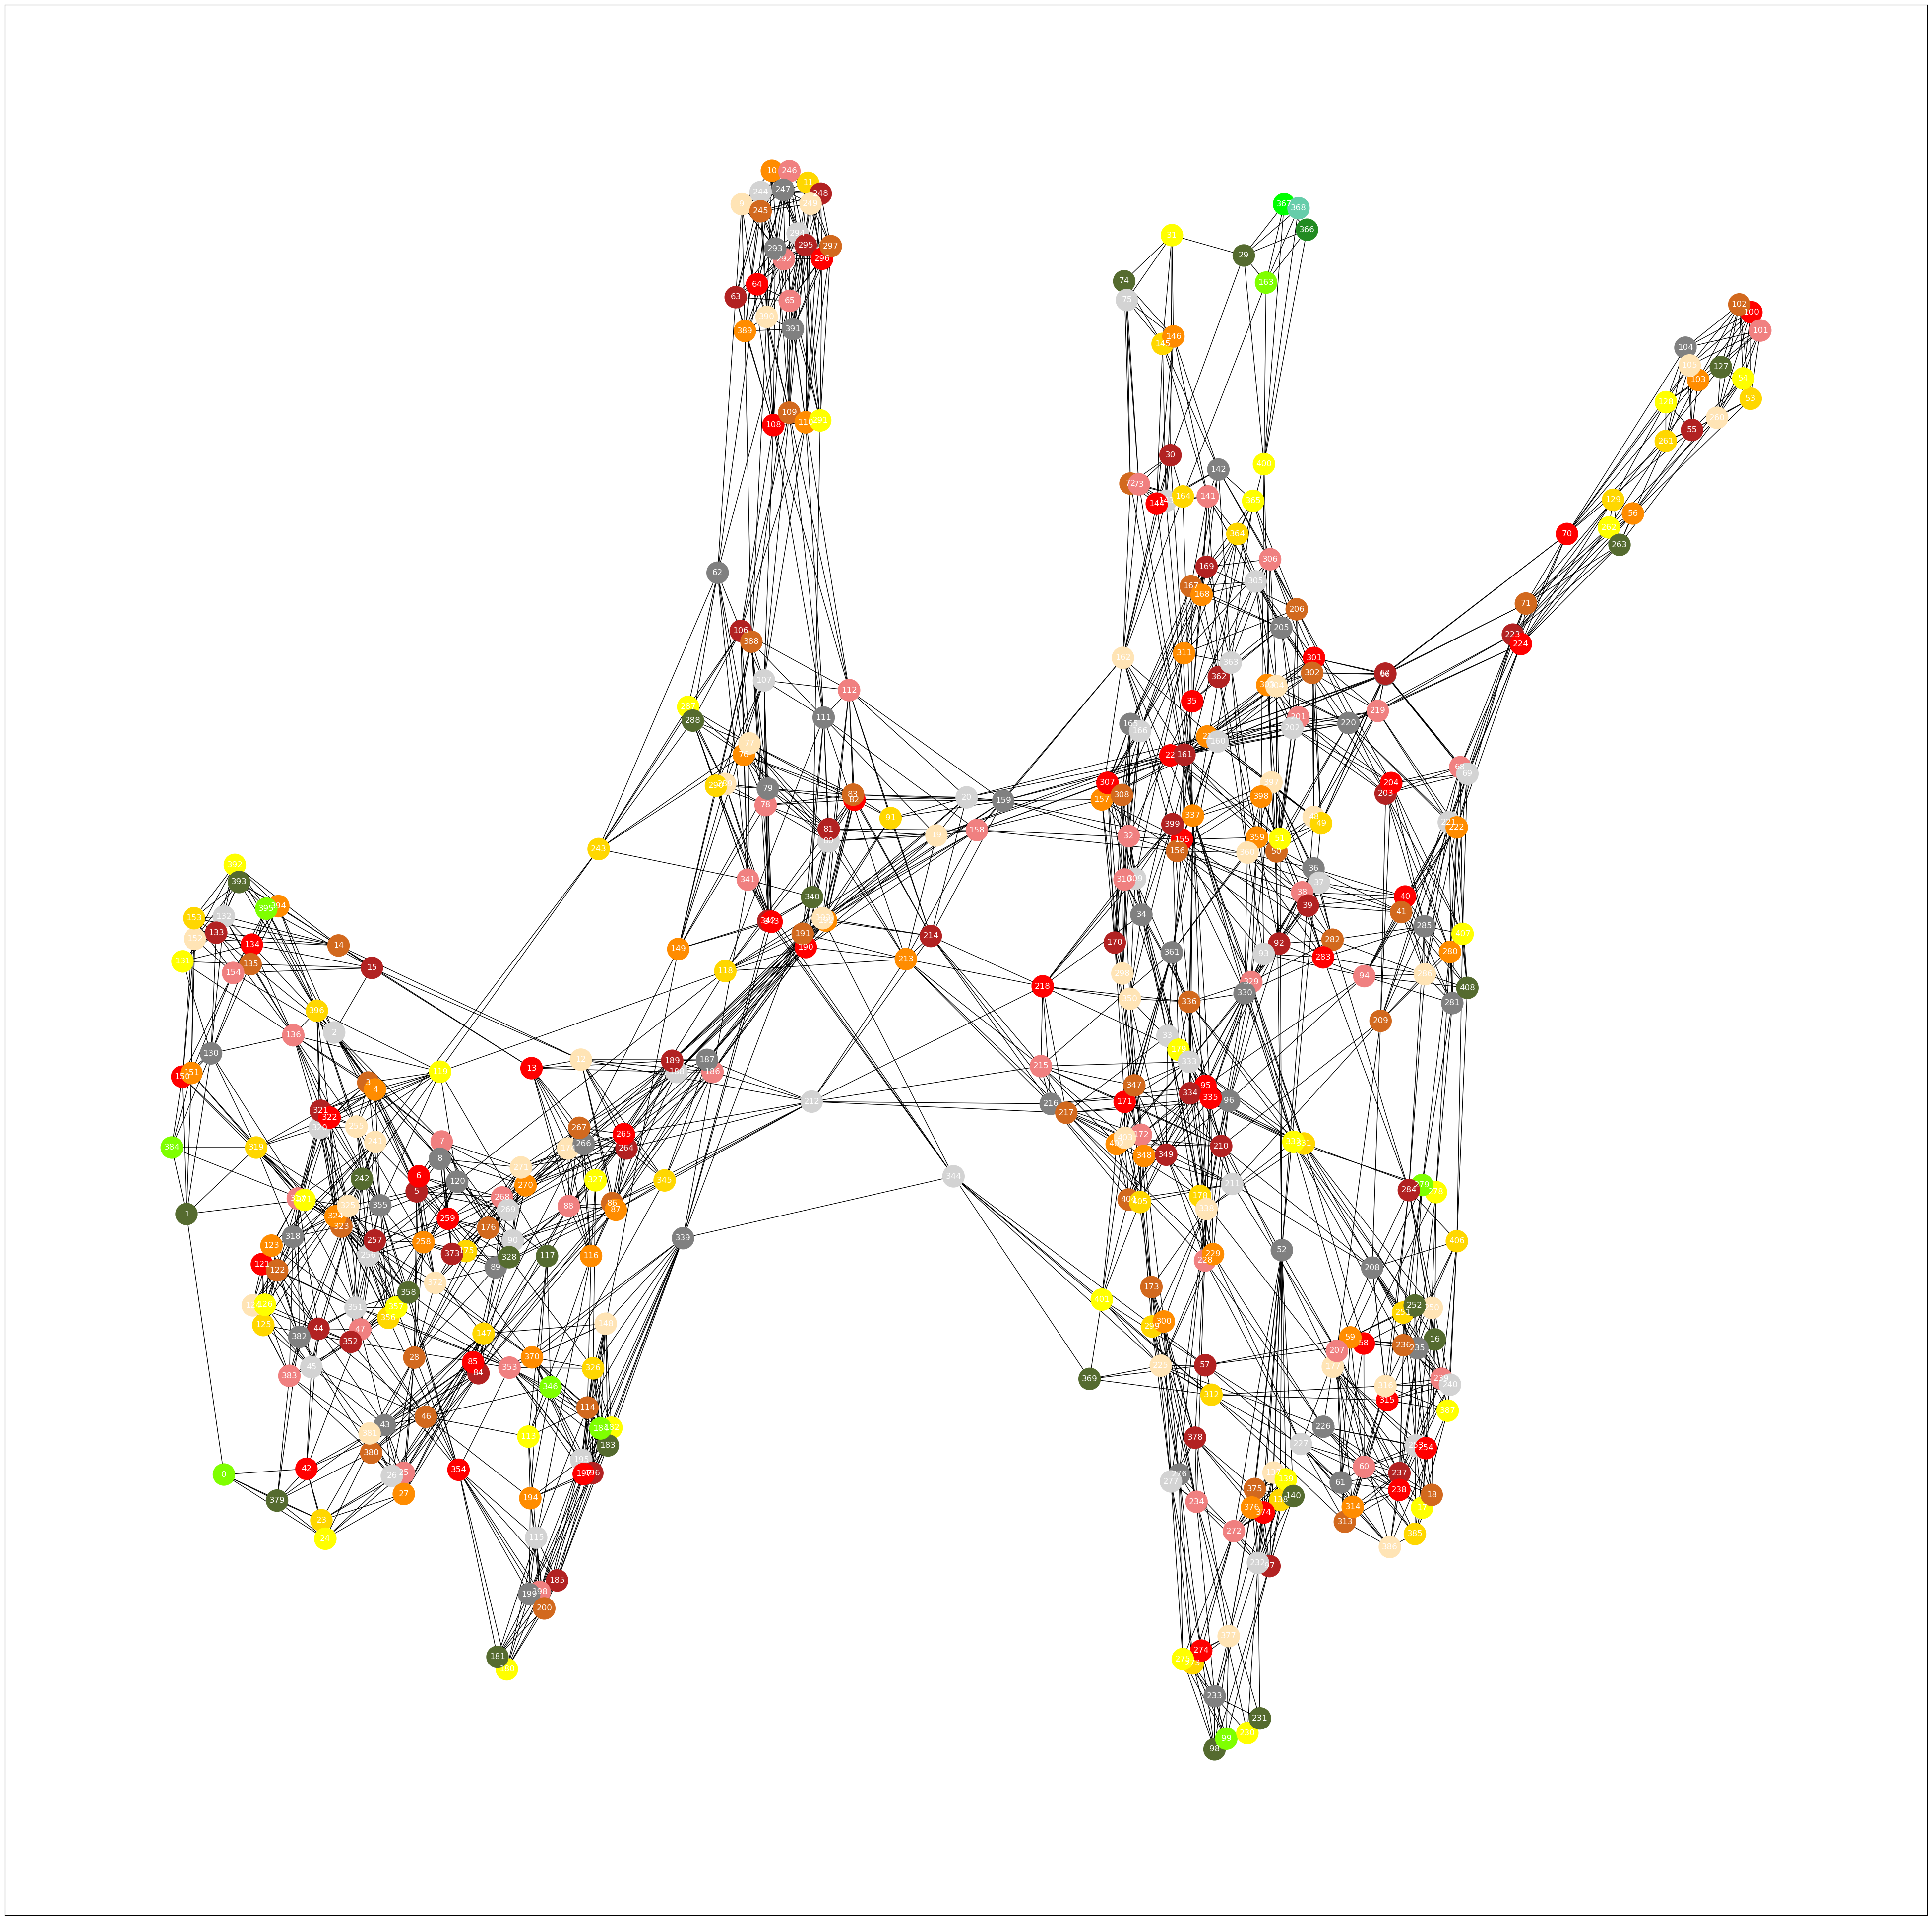

In [182]:
fig, ax = plt.subplots(figsize=(50,50))
nx.draw_networkx(network, pos = pos, with_labels=True, node_size=1000, width=1, node_color=color_map, font_size=12, font_color="white", ax=ax)
fig.savefig("Result/graph-after-colorized.png", bbox_inches='tight')

In [184]:
df['Schedule Time'].value_counts()

Senin, 10.00 - 12.50     40
Selasa, 07:00 - 09.50    40
Selasa, 10.00 - 12.50    40
Selasa, 13.00 - 15.50    40
Senin, 07:00 - 09.50     39
Senin, 13.00 - 15.50     39
Rabu, 07:00 - 09.50      39
Rabu, 10.00 - 12.50      37
Rabu, 13.00 - 15.50      32
Kamis, 07:00 - 09.50     30
Kamis, 10.00 - 12.50     22
Jum'at, 07.00 - 09.50     8
Jum'at, 10.00 - 12.50     1
Jum'at, 13.00 - 15.50     1
Name: Schedule Time, dtype: int64